In [88]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.constants as scc

In [2]:
alpha_1, alpha_2, M_1, M_2, x, y = sp.symbols('alpha_1, alpha_2, M_1, M_2, x, y', positive = True)

In [3]:
A_1 = 2*alpha_1+4*alpha_2*sp.sin(x/2)**2

In [4]:
A_1

2*alpha_1 + 4*alpha_2*sin(x/2)**2

In [5]:
A_2 = 2*alpha_1+4*alpha_2*sp.sin(y/2)**2

In [6]:
A_2

2*alpha_1 + 4*alpha_2*sin(y/2)**2

In [7]:
B = -2*alpha_1*sp.cos(x/2)*sp.cos(y/2)

In [8]:
B

-2*alpha_1*cos(x/2)*cos(y/2)

In [9]:
C = 2*alpha_1*sp.sin(x/2)*sp.sin(y/2)

In [10]:
C

2*alpha_1*sin(x/2)*sin(y/2)

In [11]:
D = sp.Matrix([[A_1/M_1, 0, B/sp.sqrt(M_1*M_2), C/sp.sqrt(M_1*M_2)], [0, A_2/M_1, C/sp.sqrt(M_1*M_2), B/sp.sqrt(M_1*M_2)], [B/sp.sqrt(M_1*M_2), C/sp.sqrt(M_1*M_2), A_1/M_2, 0], [C/sp.sqrt(M_1*M_2), B/sp.sqrt(M_1*M_2), 0, A_2/M_2]])

In [12]:
D

Matrix([
[           (2*alpha_1 + 4*alpha_2*sin(x/2)**2)/M_1,                                                  0, -2*alpha_1*cos(x/2)*cos(y/2)/(sqrt(M_1)*sqrt(M_2)),  2*alpha_1*sin(x/2)*sin(y/2)/(sqrt(M_1)*sqrt(M_2))],
[                                                 0,            (2*alpha_1 + 4*alpha_2*sin(y/2)**2)/M_1,  2*alpha_1*sin(x/2)*sin(y/2)/(sqrt(M_1)*sqrt(M_2)), -2*alpha_1*cos(x/2)*cos(y/2)/(sqrt(M_1)*sqrt(M_2))],
[-2*alpha_1*cos(x/2)*cos(y/2)/(sqrt(M_1)*sqrt(M_2)),  2*alpha_1*sin(x/2)*sin(y/2)/(sqrt(M_1)*sqrt(M_2)),            (2*alpha_1 + 4*alpha_2*sin(x/2)**2)/M_2,                                                  0],
[ 2*alpha_1*sin(x/2)*sin(y/2)/(sqrt(M_1)*sqrt(M_2)), -2*alpha_1*cos(x/2)*cos(y/2)/(sqrt(M_1)*sqrt(M_2)),                                                  0,            (2*alpha_1 + 4*alpha_2*sin(y/2)**2)/M_2]])

In [13]:
D_plugged_in = D.subs([(M_2, 2*M_1), (alpha_1, 300), (alpha_2, 200)])

In [14]:
D_plugged_in

Matrix([
[       (800*sin(x/2)**2 + 600)/M_1,                                  0, -300*sqrt(2)*cos(x/2)*cos(y/2)/M_1,  300*sqrt(2)*sin(x/2)*sin(y/2)/M_1],
[                                 0,        (800*sin(y/2)**2 + 600)/M_1,  300*sqrt(2)*sin(x/2)*sin(y/2)/M_1, -300*sqrt(2)*cos(x/2)*cos(y/2)/M_1],
[-300*sqrt(2)*cos(x/2)*cos(y/2)/M_1,  300*sqrt(2)*sin(x/2)*sin(y/2)/M_1,    (800*sin(x/2)**2 + 600)/(2*M_1),                                  0],
[ 300*sqrt(2)*sin(x/2)*sin(y/2)/M_1, -300*sqrt(2)*cos(x/2)*cos(y/2)/M_1,                                  0,    (800*sin(y/2)**2 + 600)/(2*M_1)]])

In [17]:
eva = D_plugged_in.eigenvals()

In [76]:
evaRR = np.array(list(eva.keys()))

In [81]:
# gamma -> X
x_range = np.linspace(0, np.pi, 1000)
y_value = 0.0
values_gamma_x = np.zeros((evaRR.shape[0], x_range.shape[0]))

for i_evas in range(evaRR.shape[0]):
    current_eva = evaRR[i_evas].subs([(y,y_value), (M_1, 2e-26)])
    for i in tqdm(range(len(values_gamma_x[i_evas]))):
        values_gamma_x[i_evas][i] = sp.re(sp.N(current_eva.subs(x, x_range[i])))

100%|██████████| 1000/1000 [00:18<00:00, 53.02it/s]


In [82]:
# X -> M
y_range = np.linspace(0, np.pi, 1000)
x_value = np.pi
values_x_m = np.zeros((evaRR.shape[0], y_range.shape[0]))

for i_evas in range(evaRR.shape[0]):
    current_eva = evaRR[i_evas].subs([(x, x_value), (M_1, 2e-26)])
    for i in tqdm(range(len(values_x_m[i_evas]))):
        values_x_m[i_evas][i] = sp.re(sp.N(current_eva.subs(y, y_range[i])))

100%|██████████| 1000/1000 [00:20<00:00, 49.12it/s]


In [84]:
# M -> gamma
x_range = np.linspace(np.pi, 0, 1000)
y_range = np.linspace(np.pi, 0, 1000)
values_m_gamma = np.zeros((evaRR.shape[0], x_range.shape[0]))

for i_evas in range(evaRR.shape[0]):
    current_eva = evaRR[i_evas].subs([(M_1, 2e-26)])
    for i in tqdm(range(len(values_m_gamma[i_evas]))):
        values_m_gamma[i_evas][i] = sp.re(sp.N(current_eva.subs([(x, x_range[i]), (y, y_range[i])])))

100%|██████████| 1000/1000 [01:31<00:00, 10.95it/s]


In [85]:
values = []
for i in range(values_gamma_x.shape[0]):
    values.append(np.concatenate((values_m_gamma[i], values_gamma_x[i], values_x_m[i])))

gamma_index = len(values_m_gamma[i])
x_index = len(values_gamma_x[i]) + gamma_index
m_index = len(values_x_m[i]) + x_index
x_axis = np.arange(len(values[0]))

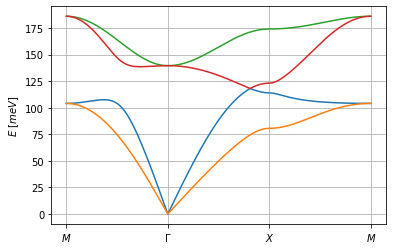

In [95]:
for i in range(len(values)):
    plt.plot(x_axis, 1e03 * scc.hbar*np.sqrt(np.abs(values[i]))/scc.e)

#plt.vlines(gamma_index, 0, 8e28, color = 'black')
#plt.vlines(x_index, 0, 8e28, color = 'black')
#plt.vlines(m_index, 0, 8e28, color = 'black')
#plt.vlines(0, 0, 8e28, color = 'black')

plt.xticks([0, gamma_index, x_index, m_index], ['$M$', '$\Gamma$', '$X$', '$M$'])
plt.grid()

plt.ylabel('$E$ $[meV]$')

plt.savefig('1_4_3_Dispersion.pdf')

#plt.legend()